In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the CSV file into a DataFrame
home_prices_df = pd.read_csv("Metro_US_All_Home_Prices.csv")

# Create a new column "Metro" by extracting the city name from "Region Name"
# We split the string in "Region Name" at the comma and take the first part (city)
home_prices_df["Metro"] = home_prices_df["RegionName"].str.split(',').str[0]

# Display the updated DataFrame to verify the new "Metro" column
home_prices_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,Metro
0,102001,0,United States,country,NaN,122710.838539,122926.726242,123194.458782,123768.692526,124429.566719,...,354242.717001,354677.065211,355473.042348,357021.050068,358884.957514,360324.712897,360888.668935,361037.327498,361281.717048,United States
1,394913,1,"New York, NY",msa,NY,218233.216724,219160.584763,220096.541902,221993.153236,223957.159952,...,639265.650987,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325,New York
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,...,926554.539271,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294,Los Angeles
3,394463,3,"Chicago, IL",msa,IL,153956.315498,154098.834197,154370.263570,155045.512395,155857.755512,...,311913.816691,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366,Chicago
4,394514,4,"Dallas, TX",msa,TX,126111.301852,126167.472266,126232.045908,126399.736872,126620.832817,...,372112.028509,372133.731174,372616.126553,373774.335129,374743.310085,374887.158218,374222.635105,373283.837228,372632.458458,Dallas


In [4]:
commute_df = pd.read_csv("Commute_Time_By_Top_25_Metro_Area_All_Years__Three Buckets_Percentage.csv")
# Drop rows in the home_prices_df where "Metro" doesn't match with any city in "Metro" column of commute_df
filtered_home_prices_df = home_prices_df[home_prices_df["Metro"].isin(commute_df["Metro"])]
# Display the filtered DataFrame to verify the rows have been dropped correctly
filtered_home_prices_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,Metro
1,394913,1,"New York, NY",msa,NY,218233.216724,219160.584763,220096.541902,221993.153236,223957.159952,...,639265.650987,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325,New York
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,...,926554.539271,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294,Los Angeles
3,394463,3,"Chicago, IL",msa,IL,153956.315498,154098.834197,154370.263570,155045.512395,155857.755512,...,311913.816691,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366,Chicago
4,394514,4,"Dallas, TX",msa,TX,126111.301852,126167.472266,126232.045908,126399.736872,126620.832817,...,372112.028509,372133.731174,372616.126553,373774.335129,374743.310085,374887.158218,374222.635105,373283.837228,372632.458458,Dallas
5,394692,5,"Houston, TX",msa,TX,121737.010654,121759.686522,121674.688937,121725.495460,121772.362850,...,304832.859556,304826.840219,305204.501474,306189.659687,307208.643453,307743.352455,307625.056921,307261.595181,307043.671704,Houston


In [5]:
# Step 1: Identify columns that contain date information
date_columns = filtered_home_prices_df.filter(regex=r'^\d{4}-\d{2}-\d{2}$').columns

# Step 2: Create a new DataFrame to store yearly averages
# Extract the year from the date columns
filtered_home_prices_df_yearly_avg = filtered_home_prices_df.copy()

# Loop through each year from the date columns
for year in range(2000, 2025):  # From 2000 to 2024
    # Select all columns that match the current year
    year_columns = [col for col in date_columns if col.startswith(str(year))]
    
    # Calculate the average for that year across the matching columns
    filtered_home_prices_df_yearly_avg[str(year)] = filtered_home_prices_df[year_columns].mean(axis=1)

# Drop the original date columns
filtered_home_prices_df_yearly_avg = filtered_home_prices_df_yearly_avg.drop(columns=date_columns)

# Display the updated DataFrame with yearly averages
filtered_home_prices_df_yearly_avg.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Metro,2000,2001,2002,2003,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,394913,1,"New York, NY",msa,NY,New York,228236.333677,256591.123039,289406.051521,332275.171124,...,417767.278050,436687.392137,458570.405676,481006.500113,497671.075482,514606.039175,562982.333172,609970.348571,623831.364522,658359.949166
2,753899,2,"Los Angeles, CA",msa,CA,Los Angeles,232411.457365,257442.579993,291677.819819,346346.762012,...,507705.187043,527084.898482,573910.059070,633907.170969,649673.994925,683222.738515,778279.042016,882911.563806,881706.948498,931659.381922
3,394463,3,"Chicago, IL",msa,IL,Chicago,158276.964195,171890.368310,185654.507685,199856.902187,...,200373.019284,210856.095856,221825.942265,232372.941507,238138.587799,244847.236934,270610.015172,294727.817170,303240.128095,319244.572361
4,394514,4,"Dallas, TX",msa,TX,Dallas,127272.724323,129451.749818,132613.591398,136409.226463,...,182117.867220,203734.502389,224890.794380,243209.782563,251633.656933,262748.133755,304406.673419,369235.098967,371281.826100,373536.698994
5,394692,5,"Houston, TX",msa,TX,Houston,122403.123483,124028.932793,127026.323361,131259.404075,...,183534.022383,194909.774814,202110.803554,210371.454699,218684.752642,227258.825353,256617.624359,300703.437909,304271.847022,306637.915137


In [6]:
# Select the columns representing years between 2010 and 2024 (inclusive)
columns_to_keep = [str(year) for year in range(2010, 2025)]  # This creates a list of year columns from 2010 to 2024

# Keep only the required year columns and any non-year columns (like 'Metro', etc.)
# Assuming there are other necessary columns (e.g., 'Metro'), we include those as well
necessary_columns = ['Metro']  # Adjust this list to include any non-year columns you want to keep

# Filter the DataFrame to keep only the necessary and year columns
filtered_home_prices_df_yearly_avg = filtered_home_prices_df_yearly_avg[necessary_columns + columns_to_keep]

# Display the updated DataFrame
filtered_home_prices_df_yearly_avg.head()

,Metro,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,New York,396589.647630,384564.909211,375518.290765,384470.975667,404313.654609,417767.278050,436687.392137,458570.405676,481006.500113,497671.075482,514606.039175,562982.333172,609970.348571,623831.364522,658359.949166
2,Los Angeles,404119.916610,381628.225170,372390.499355,430129.125075,483187.074509,507705.187043,527084.898482,573910.059070,633907.170969,649673.994925,683222.738515,778279.042016,882911.563806,881706.948498,931659.381922
3,Chicago,197308.543137,179647.501490,167993.290058,175350.972220,192030.788324,200373.019284,210856.095856,221825.942265,232372.941507,238138.587799,244847.236934,270610.015172,294727.817170,303240.128095,319244.572361
4,Dallas,147029.550825,141360.812372,142964.048910,153243.281400,166007.231691,182117.867220,203734.502389,224890.794380,243209.782563,251633.656933,262748.133755,304406.673419,369235.098967,371281.826100,373536.698994
5,Houston,148284.112874,142123.906743,140945.029754,149056.617277,165669.306473,183534.022383,194909.774814,202110.803554,210371.454699,218684.752642,227258.825353,256617.624359,300703.437909,304271.847022,306637.915137


In [7]:
Home_Prices_Adjusted_df = pd.melt(filtered_home_prices_df_yearly_avg, id_vars=['Metro'], var_name='Year', value_name='Value')
Home_Prices_Adjusted_df = Home_Prices_Adjusted_df.sort_values(by=['Metro', 'Year']).reset_index(drop=True)
Home_Prices_Adjusted_df.head(10)

,Metro,Year,Value
0,Atlanta,2010,148689.100170
1,Atlanta,2011,131296.644196
2,Atlanta,2012,127172.806650
3,Atlanta,2013,141549.412391
4,Atlanta,2014,162089.948743
5,Atlanta,2015,174951.646311
6,Atlanta,2016,189197.874487
7,Atlanta,2017,204153.911849
8,Atlanta,2018,222524.201892
9,Atlanta,2019,237693.585081


Mean Squared Error: 15914836827.049942
R-squared: 0.08658931912789081


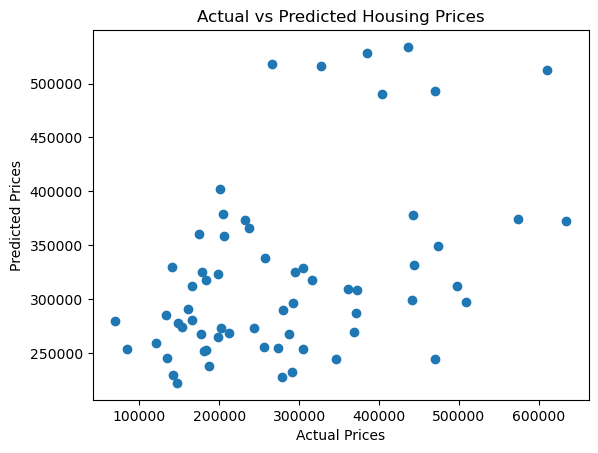

In [9]:
# Merge the datasets on 'Metro' and 'Year'
Home_Prices_Adjusted_df['Year'] = Home_Prices_Adjusted_df['Year'].astype(int)
commute_df['Year'] = commute_df['Year'].astype(int)
merged_data = pd.merge(Home_Prices_Adjusted_df, commute_df, on=['Metro', 'Year'])

# Select features (Short, Medium, Long Commutes) and target (Housing Value)
X = merged_data[['Short Commutes - Less than half-hour', 'Medium Commutes - Half-hour to one hour', 'Long Commutes - More than one hour']]
y = merged_data['Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# # Train the model
# rf_model.fit(X_train, y_train)
# # Predict on the test set
# y_pred = rf_model.predict(X_test)
# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

# Initialize the regression model
lr_model = LinearRegression()
# Train the lr_model
lr_model.fit(X_train, y_train)
# Predict on the test set
y_pred = lr_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()